# Trading Signal Features

---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('etc.csv')
btc_df=pd.read_csv(csv_path)
btc_df=btc_df.tail(100)


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [3]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['date'], infer_datetime_format=True), inplace=True)
btc_df.drop(columns=['date'], inplace=True)
btc_df.rename(columns={'PriceUSD':'Close'}, inplace=True)
btc_df.to_csv('../../etc1.csv')


In [4]:
btc_df.columns

Index(['AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'IssContNtv', 'IssContPctAnn',
       'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj', 'NVTAdj90',
       'PriceBTC', 'Close', 'ROI1yr', 'ROI30d', 'SplyCur', 'TxCnt', 'TxTfrCnt',
       'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv',
       'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv',
       'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

### Drop NAs and Calculate Daily Returns 

In [5]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()
btc_df

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,daily_return
date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,187513,6202,8504373,1371.230732,6.905655e+08,1.183214e+14,0.000256,0.001570,0.000021,0.000129,...,15.363538,94.170569,0.999805,6.128292,6.038331e+05,3.701186e+06,0.049179,0.051750,0.046325,NaN
2019-08-05,165892,6090,8635329,1417.952217,6.960841e+08,1.199860e+14,0.000287,0.001772,0.000023,0.000143,...,33.441195,206.570613,1.000013,6.177209,1.389883e+06,8.585488e+06,0.049118,0.051770,0.046295,0.007773
2019-08-06,12664,6015,8168092,1357.953782,6.601434e+08,1.197640e+14,0.000318,0.001860,0.000023,0.000135,...,22.825215,133.685826,0.999971,5.856764,9.294656e+05,5.443821e+06,0.049268,0.052074,0.046347,-0.051835
2019-08-07,13615,6146,9679295,1574.893427,6.671961e+08,1.163126e+14,0.000486,0.002876,0.000023,0.000137,...,12.540188,74.215545,0.999375,5.914519,5.191763e+05,3.072598e+06,0.049014,0.052072,0.046267,0.010463
2019-08-08,17718,6139,8200581,1335.817071,6.766572e+08,1.199989e+14,0.000300,0.001798,0.000023,0.000139,...,23.203606,139.240885,0.999837,5.999850,9.356390e+05,5.614610e+06,0.049014,0.052169,0.046063,0.013959
2019-08-09,16684,6109,8019973,1312.812735,6.551291e+08,1.188777e+14,0.000296,0.001719,0.000023,0.000134,...,17.077542,99.197452,0.999903,5.808087,6.660241e+05,3.868701e+06,0.049066,0.051994,0.046038,-0.032026
2019-08-10,11260,6100,7757109,1271.657213,6.388112e+08,1.213419e+14,0.000277,0.001568,0.000023,0.000131,...,15.376821,87.074963,0.999964,5.662538,5.864258e+05,3.320778e+06,0.049072,0.046086,0.046106,-0.025119
2019-08-11,11415,6084,7775127,1277.963018,6.578199e+08,1.219838e+14,0.000292,0.001702,0.000023,0.000135,...,10.621624,61.923903,0.999713,5.828312,4.091981e+05,2.385618e+06,0.049114,0.045966,0.045957,0.029534
2019-08-12,24224,6154,7973059,1295.589698,6.530732e+08,1.213896e+14,0.000310,0.001794,0.000023,0.000134,...,38.889804,225.041768,0.999964,5.786443,1.499280e+06,8.675810e+06,0.049113,0.045955,0.045957,-0.007433


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [6]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['crossover_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['crossover_signal'] = btc_df['crossover_long'] + btc_df['crossover_short']



### Plot Exponential Moving Average of Closing Prices

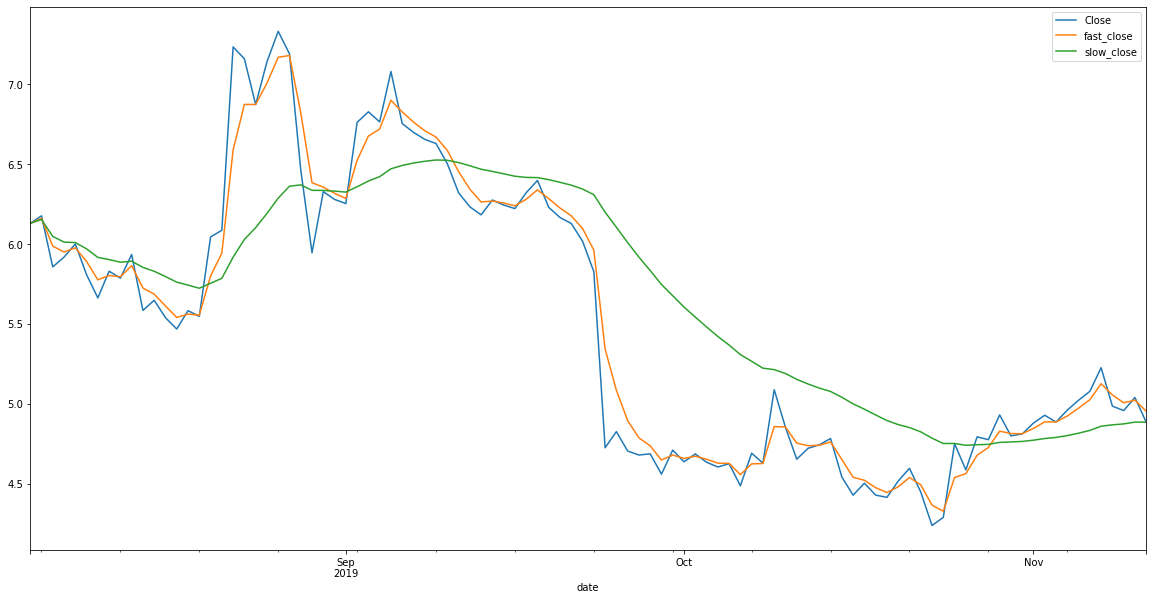

In [7]:
# Plot the EMA of BTC/USD closing prices
btc_df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [8]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
btc_df['vol_trend_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['vol_trend_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['vol_trend_signal'] = btc_df['vol_trend_long'] + btc_df['vol_trend_short']

btc_df

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,187513,6202,8504373,1371.230732,6.905655e+08,1.183214e+14,0.000256,0.001570,0.000021,0.000129,...,6.129485,6.129485,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2019-08-05,165892,6090,8635329,1417.952217,6.960841e+08,1.199860e+14,0.000287,0.001772,0.000023,0.000143,...,6.161248,6.154133,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2019-08-06,12664,6015,8168092,1357.953782,6.601434e+08,1.197640e+14,0.000318,0.001860,0.000023,0.000135,...,5.987356,6.048127,0.0,-1.0,-1.0,0.042150,0.042150,0.0,0.0,0.0
2019-08-07,13615,6146,9679295,1574.893427,6.671961e+08,1.163126e+14,0.000486,0.002876,0.000023,0.000137,...,5.950481,6.012199,0.0,-1.0,-1.0,0.036928,0.035285,0.0,-1.0,-1.0
2019-08-08,17718,6139,8200581,1335.817071,6.766572e+08,1.199989e+14,0.000300,0.001798,0.000023,0.000139,...,5.976468,6.009599,0.0,-1.0,-1.0,0.027793,0.031127,1.0,0.0,1.0
2019-08-09,16684,6109,8019973,1312.812735,6.551291e+08,1.188777e+14,0.000296,0.001719,0.000023,0.000134,...,5.891227,5.970048,0.0,-1.0,-1.0,0.029300,0.029535,1.0,0.0,1.0
2019-08-10,11260,6100,7757109,1271.657213,6.388112e+08,1.213419e+14,0.000277,0.001568,0.000023,0.000131,...,5.776085,5.916516,0.0,-1.0,-1.0,0.021377,0.026708,1.0,0.0,1.0
2019-08-11,11415,6084,7775127,1277.963018,6.578199e+08,1.219838e+14,0.000292,0.001702,0.000023,0.000135,...,5.803140,5.902902,0.0,-1.0,-1.0,0.033932,0.029723,0.0,-1.0,-1.0
2019-08-12,24224,6154,7973059,1295.589698,6.530732e+08,1.213896e+14,0.000310,0.001794,0.000023,0.000134,...,5.794880,5.886128,0.0,-1.0,-1.0,0.025082,0.027016,1.0,0.0,1.0


### Plot Exponential Moving Average of Daily Return Volatility

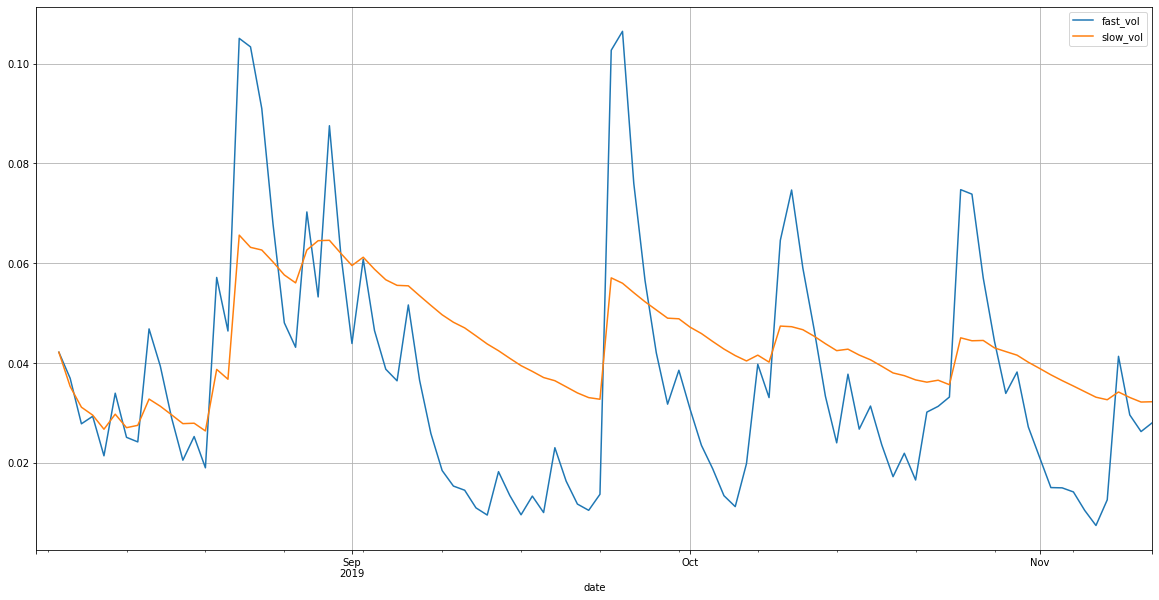

In [9]:
# Plot the EMA of BTC/USD daily return volatility
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
plt.grid()

## When the small MA goes ABOVE the large MA BUY
## When the long MA goes BELOW the small MA SELL


### Construct Bollinger Band (Trading Signal, Feature Three)

In [10]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bollinger_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bollinger_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bollinger_signal'] = btc_df['bollinger_long'] + btc_df['bollinger_short']

btc_df.to_csv('../../etc1.csv')

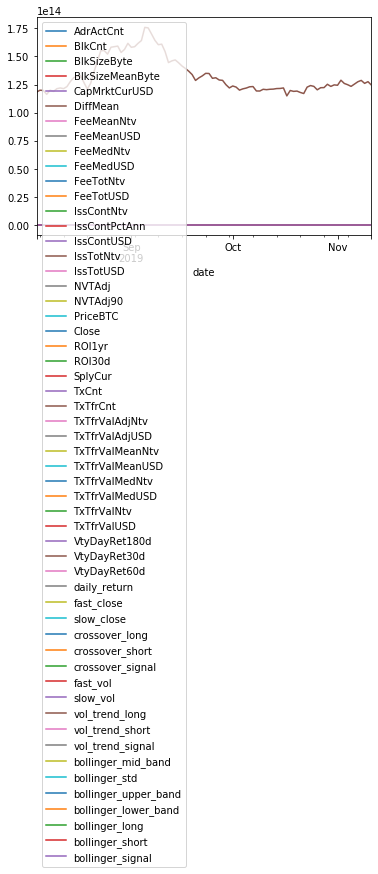

In [11]:
btc_df.plot()

### Plot Bollinger Bands

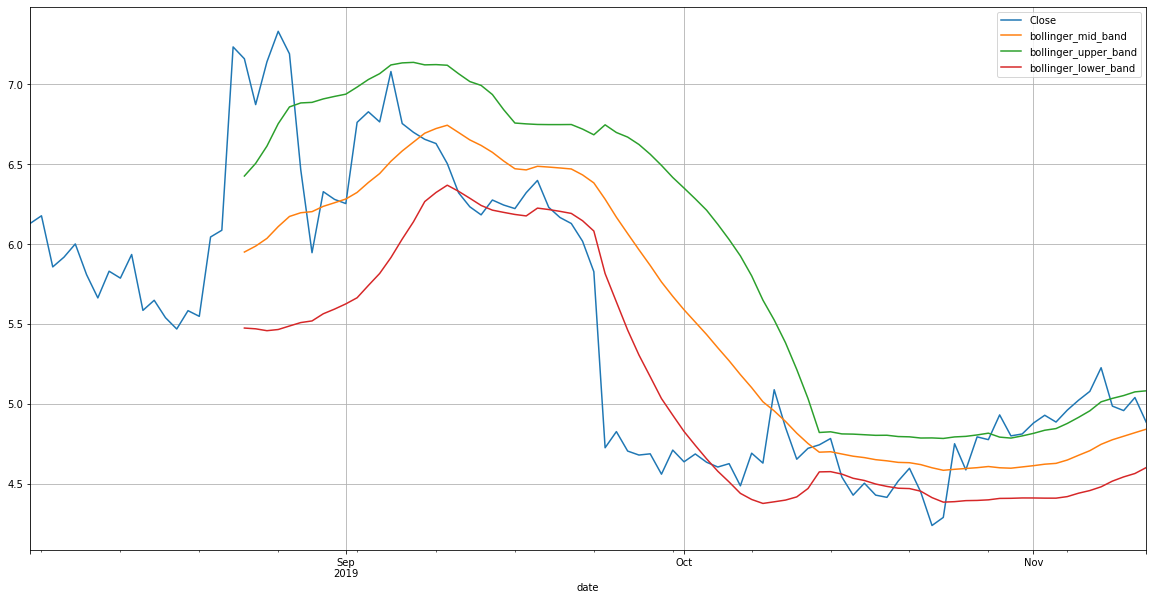

In [20]:
# Plot the Bollinger Bands for BTC/USD closing prices
btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
plt.grid()

## Buy when the Close price goes below the band
## Sell when the price goes above the band
## Hold when inside the band

In [13]:
import os
import ccxt
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")
kraken = ccxt.kraken({"apiKey": kraken_public_key, "secret": kraken_secret_key})
close=[]
datetime=[]


In [14]:
close.append(kraken.fetch_ticker("ETC/USD")["last"])
datetime.append(kraken.fetch_ticker("ETC/USD")["datetime"])
df = pd.DataFrame({"close": close})
df.index = pd.to_datetime(datetime)
df

,close
2019-11-12 14:08:11.168000+00:00,4.824


In [15]:
bollinger_window = 20

# Calculate rolling mean and standard deviation
df['bollinger_mid_band'] = df['close'].rolling(window=bollinger_window).mean()
df['bollinger_std'] = df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df['bollinger_upper_band']  = df['bollinger_mid_band'] + (df['bollinger_std'] * 1)
df['bollinger_lower_band']  = df['bollinger_mid_band'] - (df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
df['bollinger_long'] = np.where(df['close'] < df['bollinger_lower_band'], 1.0, 0.0)
df['bollinger_short'] = np.where(df['close'] > df['bollinger_upper_band'], -1.0, 0.0)
df['bollinger_signal'] = df['bollinger_long'] + df['bollinger_short']

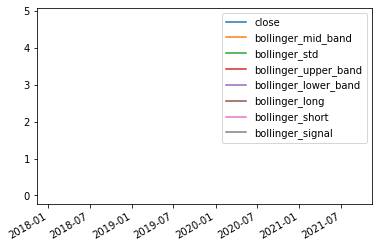

In [16]:
df.plot()

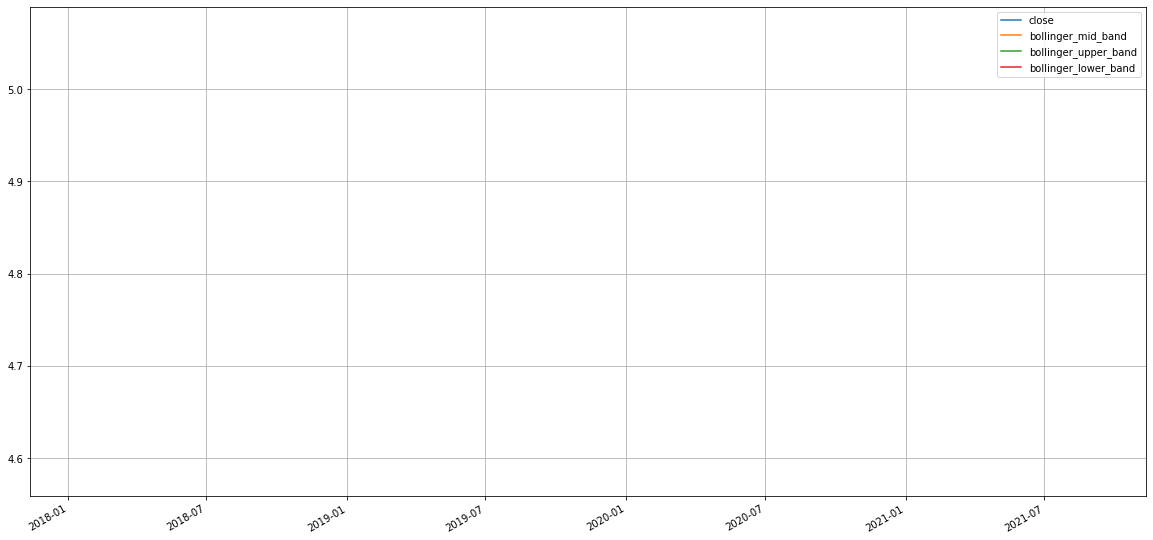

In [21]:
# Plot the Bollinger Bands for BTC/USD closing prices
df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
plt.grid()

In [1]:
df

NameError: name 'df' is not defined